In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.__version__

'2.6.0'

In [4]:
fashion_mnist =  keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
#validation세트 만들고 경사하강법을 위해 255로 나눠줌(0~1)

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test/255.0

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover","Dress","Coat","Sandal","Shirt","Sneaker","bas","Ankle boot"]

In [9]:
class_names[y_train[0]]

'Coat'

### 아래의 Flatten layer는 28 * 28행렬을 784배열로 바꿔줌

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
### 위와 동일

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [12]:
from keras.layers import Dense
output_layer = Dense(10)

In [13]:
output_layer

In [14]:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)

In [15]:
output_layer

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.layers

In [18]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [19]:
#model.get_layer("dense_50") is hidden1

In [20]:
weights, biases = hidden1.get_weights()

In [21]:
weights

array([[-0.02858361,  0.06100357, -0.07045618, ..., -0.02179129,
        -0.02119661,  0.00732782],
       [ 0.00361074, -0.06074112, -0.01782667, ...,  0.05798018,
         0.06732593, -0.03938219],
       [-0.04666416,  0.07172008,  0.00057728, ..., -0.01996695,
         0.05854671, -0.03377763],
       ...,
       [-0.00445912,  0.07313295,  0.04521578, ...,  0.0121767 ,
         0.05873668,  0.03804147],
       [-0.06578875,  0.06930776,  0.0647504 , ...,  0.007277  ,
         0.06410682,  0.06061959],
       [ 0.07223062,  0.06061912,  0.05160385, ..., -0.03671878,
         0.02795397,  0.03431104]], dtype=float32)

In [22]:
### 첫번쨰 층인 784입력층에 300개 은닝층에 대한 가중치이므로 784 * 300

weights.shape

(784, 300)

In [23]:
###Flatten층은 데이터 변환만 해주므로 편향이 없음

biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [24]:
biases.shape

(300,)

## optimizer는 가중치 학습방법 (SGD , adam?)등등
## loss는 트레이닝시 사용하는 손실함수(rmse, acc)등등
## metrics는 훈련이 아니라 성능평가시에만 사용됨->loss와 동일한 함수 사용가능

In [25]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [26]:
### validation_data에 Valid셋을 넣는것 보다는 0.1같은 비율을 넣어 나눠주는게 더 편함

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7069 - accuracy: 0.7683 - val_loss: 0.4996 - val_accuracy: 0.8288
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4869 - accuracy: 0.8295 - val_loss: 0.4687 - val_accuracy: 0.8340
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4431 - accuracy: 0.8454 - val_loss: 0.4485 - val_accuracy: 0.8450
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4135 - accuracy: 0.8551 - val_loss: 0.4028 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3937 - accuracy: 0.8607 - val_loss: 0.3875 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3783 - accuracy: 0.8677 - val_loss: 0.3868 - val_accuracy: 0.8652
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3638 - accuracy: 0.8731 - val_loss: 0.3559 - val_accuracy:

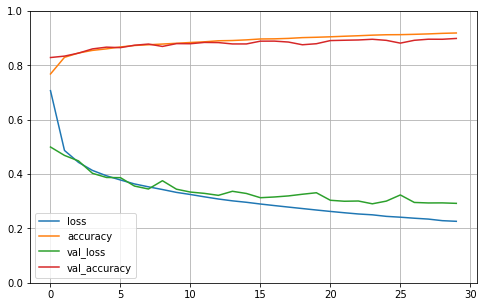

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
history.history["loss"]

[0.7069084644317627,
 0.4869307279586792,
 0.4430992901325226,
 0.4134500324726105,
 0.3937191069126129,
 0.37825652956962585,
 0.3637840449810028,
 0.35306426882743835,
 0.34317103028297424,
 0.33266374468803406,
 0.3248800039291382,
 0.31631115078926086,
 0.30827733874320984,
 0.30153802037239075,
 0.29623115062713623,
 0.28984519839286804,
 0.2841196656227112,
 0.2785862982273102,
 0.2731582522392273,
 0.26778724789619446,
 0.2625683844089508,
 0.2577129602432251,
 0.25321754813194275,
 0.25011348724365234,
 0.24443966150283813,
 0.24137349426746368,
 0.2375958114862442,
 0.23442772030830383,
 0.22859109938144684,
 0.22623217105865479]

In [29]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 672us/step - loss: 0.3237 - accuracy: 0.8857


[0.32374727725982666, 0.885699987411499]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [31]:
### model.predict_classes함수와 같음

y_proba.argmax(axis=1)

array([9, 2, 1], dtype=int64)

In [32]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [33]:
###   input_shape매개변수 형태에 chk'
###    과대적합을 막기위해 은닉층과 뉴런수를 줄임

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)
model.save("my_keras.h5")

Epoch 1/20
363/363 [==============================] - 0s 770us/step - loss: 1.2447 - val_loss: 0.6088
Epoch 2/20
363/363 [==============================] - 0s 553us/step - loss: 0.5401 - val_loss: 0.5574
Epoch 3/20
363/363 [==============================] - 0s 537us/step - loss: 0.4566 - val_loss: 0.4690
Epoch 4/20
363/363 [==============================] - 0s 626us/step - loss: 0.5562 - val_loss: 0.7066
Epoch 5/20
363/363 [==============================] - 0s 536us/step - loss: 0.4262 - val_loss: 0.3846
Epoch 6/20
363/363 [==============================] - 0s 538us/step - loss: 0.4040 - val_loss: 0.3786
Epoch 7/20
363/363 [==============================] - 0s 587us/step - loss: 0.3969 - val_loss: 0.3674
Epoch 8/20
363/363 [==============================] - 0s 544us/step - loss: 0.3897 - val_loss: 0.3658
Epoch 9/20
363/363 [==============================] - 0s 536us/step - loss: 0.3848 - val_loss: 0.3575
Epoch 10/20
363/363 [==============================] - 0s 534us/step - loss: 0.381

In [34]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs = [output])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
  1/363 [..............................] - ETA: 57s - loss: 7.9062

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


363/363 [==============================] - 0s 778us/step - loss: 1.9264 - val_loss: 0.7738
Epoch 2/20
363/363 [==============================] - 0s 595us/step - loss: 0.7177 - val_loss: 0.6441
Epoch 3/20
363/363 [==============================] - 0s 572us/step - loss: 0.6524 - val_loss: 0.5932
Epoch 4/20
363/363 [==============================] - 0s 621us/step - loss: 0.6090 - val_loss: 0.5571
Epoch 5/20
363/363 [==============================] - 0s 583us/step - loss: 0.5753 - val_loss: 0.5284
Epoch 6/20
363/363 [==============================] - 0s 573us/step - loss: 0.5486 - val_loss: 0.5080
Epoch 7/20
363/363 [==============================] - 0s 580us/step - loss: 0.5280 - val_loss: 0.4890
Epoch 8/20
363/363 [==============================] - 0s 586us/step - loss: 0.5115 - val_loss: 0.4739
Epoch 9/20
363/363 [==============================] - 0s 579us/step - loss: 0.4980 - val_loss: 0.4630
Epoch 10/20
363/363 [==============================] - 0s 592us/step - loss: 0.4878 - val_los

In [35]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs = [output])

In [36]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 943us/step - loss: 2.1883 - val_loss: 0.9576
Epoch 2/20
363/363 [==============================] - 0s 668us/step - loss: 0.8242 - val_loss: 0.7123
Epoch 3/20
363/363 [==============================] - 0s 629us/step - loss: 0.6988 - val_loss: 0.6436
Epoch 4/20
363/363 [==============================] - 0s 628us/step - loss: 0.6453 - val_loss: 0.6021
Epoch 5/20
363/363 [==============================] - 0s 723us/step - loss: 0.6112 - val_loss: 0.5740
Epoch 6/20
363/363 [==============================] - 0s 671us/step - loss: 0.5861 - val_loss: 0.5553
Epoch 7/20
363/363 [==============================] - 0s 615us/step - loss: 0.5673 - val_loss: 0.5359
Epoch 8/20
363/363 [==============================] - 0s 746us/step - loss: 0.5526 - val_loss: 0.5297
Epoch 9/20
363/363 [==============================] - 0s 651us/step - loss: 0.5413 - val_loss: 0.5150
Epoch 10/20
363/363 [==============================] - 0s 637us/step - loss: 0.531

In [37]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 847us/step - loss: 0.4782 - val_loss: 0.4577
Epoch 2/20
363/363 [==============================] - 0s 631us/step - loss: 0.4752 - val_loss: 0.4533
Epoch 3/20
363/363 [==============================] - 0s 621us/step - loss: 0.4724 - val_loss: 0.4498
Epoch 4/20
363/363 [==============================] - 0s 615us/step - loss: 0.4696 - val_loss: 0.4477
Epoch 5/20
363/363 [==============================] - 0s 641us/step - loss: 0.4675 - val_loss: 0.4484
Epoch 6/20
363/363 [==============================] - 0s 610us/step - loss: 0.4647 - val_loss: 0.4446
Epoch 7/20
363/363 [==============================] - 0s 621us/step - loss: 0.4625 - val_loss: 0.4406
Epoch 8/20
363/363 [==============================] - 0s 619us/step - loss: 0.4609 - val_loss: 0.4389
Epoch 9/20
363/363 [==============================] - 0s 642us/step - loss: 0.4582 - val_loss: 0.4380
Epoch 10/20
363/363 [==============================] - 0s 650us/step - loss: 0.456

In [38]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [39]:
###손실 mse로 전달가능하며 이때 두 출력에 모두 적용됨

model.compile(loss=["mse", "mse"], loss_weights = [0.9, 0.1], optimizer="sgd")

In [40]:
history = model.fit(
    [X_train_A, X_train_B], [y_train, y_train], epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.4306 - main_output_loss: 1.3380 - aux_output_loss: 2.2643 - val_loss: 0.8937 - val_main_output_loss: 0.8153 - val_aux_output_loss: 1.5990
Epoch 2/20
363/363 [==============================] - 0s 906us/step - loss: 0.6091 - main_output_loss: 0.5366 - aux_output_loss: 1.2621 - val_loss: 0.5342 - val_main_output_loss: 0.4680 - val_aux_output_loss: 1.1305
Epoch 3/20
363/363 [==============================] - 0s 901us/step - loss: 0.5280 - main_output_loss: 0.4727 - aux_output_loss: 1.0250 - val_loss: 0.4861 - val_main_output_loss: 0.4352 - val_aux_output_loss: 0.9439
Epoch 4/20
363/363 [==============================] - 0s 894us/step - loss: 0.4913 - main_output_loss: 0.4498 - aux_output_loss: 0.8642 - val_loss: 0.4650 - val_main_output_loss: 0.4269 - val_aux_output_loss: 0.8077
Epoch 5/20
363/363 [==============================] - 0s 893us/step - loss: 0.4715 - main_output_loss: 0.4390 - aux_output_loss: 0.7638 - 

In [41]:
total_loss ,main_loss, aux_loss = model.evaluate(
[X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 586us/step - loss: 0.3930 - main_output_loss: 0.3785 - aux_output_loss: 0.5244


In [42]:
y_pred_main, y_pre_aux = model.predict([X_new_A, X_new_B])

In [43]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu",**kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers,Dense(1)
        self.aux_output = keras.layers,Dense(1)        
        
        def call(self, inputs):
            input_A, input_B = inputs
            hidden1 = self.hidden1(input_B)
            hidden2 = self.hidden2(hidden1)
            concat = keras.layers.concatenate([input_A, hidden2])
            main_output = self.main_output(concat)
            aux_output = self.aux_output(hidden2)
            return main_output, aux_output
model = WideAndDeepModel()

In [44]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs = [output])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
363/363 [==============================] - 0s 478us/step - loss: 1.2925
Epoch 2/10
363/363 [==============================] - 0s 435us/step - loss: 1.4331
Epoch 3/10
363/363 [==============================] - 0s 430us/step - loss: 5.2633
Epoch 4/10
363/363 [==============================] - 0s 451us/step - loss: 15.7410
Epoch 5/10
363/363 [==============================] - 0s 427us/step - loss: nan
Epoch 6/10
363/363 [==============================] - 0s 448us/step - loss: nan
Epoch 7/10
363/363 [==============================] - 0s 434us/step - loss: nan
Epoch 8/10
363/363 [==============================] - 0s 442us/step - loss: nan
Epoch 9/10
363/363 [==============================] - 0s 430us/step - loss: nan
Epoch 10/10
363/363 [==============================] - 0s 472us/step - loss: nan


In [45]:
### 그냥 mocel.save를 위한 퍼셉트론

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10)
model.save("my_keras.h5")

Epoch 1/10
363/363 [==============================] - 0s 445us/step - loss: 2.0426
Epoch 2/10
363/363 [==============================] - 0s 425us/step - loss: 0.7603
Epoch 3/10
363/363 [==============================] - 0s 424us/step - loss: 0.6733
Epoch 4/10
363/363 [==============================] - 0s 419us/step - loss: 0.6364
Epoch 5/10
363/363 [==============================] - 0s 425us/step - loss: 0.6078
Epoch 6/10
363/363 [==============================] - 0s 424us/step - loss: 0.5834
Epoch 7/10
363/363 [==============================] - 0s 446us/step - loss: 0.5628
Epoch 8/10
363/363 [==============================] - 0s 430us/step - loss: 0.5453
Epoch 9/10
363/363 [==============================] - 0s 420us/step - loss: 0.5303
Epoch 10/10
363/363 [==============================] - 0s 422us/step - loss: 0.5176


In [50]:
model = keras.models.load_model("my_keras.h5")

In [52]:
### 학습 길어지면 model.fit시에 매개변수에 체크포인트를 넣어 중간중간 저장한다

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 0s 451us/step - loss: 0.4288
Epoch 2/10
363/363 [==============================] - 0s 452us/step - loss: 0.4269
Epoch 3/10
363/363 [==============================] - 0s 447us/step - loss: 0.4252
Epoch 4/10
363/363 [==============================] - 0s 446us/step - loss: 0.4235
Epoch 5/10
363/363 [==============================] - 0s 487us/step - loss: 0.4219
Epoch 6/10
363/363 [==============================] - 0s 525us/step - loss: 0.4203
Epoch 7/10
363/363 [==============================] - 0s 582us/step - loss: 0.4179
Epoch 8/10
363/363 [==============================] - 0s 462us/step - loss: 0.4170
Epoch 9/10
363/363 [==============================] - 0s 458us/step - loss: 0.4157
Epoch 10/10
363/363 [==============================] - 0s 481us/step - loss: 0.4137


In [55]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras.h5")

Epoch 1/100
363/363 [==============================] - 0s 637us/step - loss: 0.3433 - val_loss: 0.3335
Epoch 2/100
363/363 [==============================] - 0s 595us/step - loss: 0.3425 - val_loss: 0.3309
Epoch 3/100
363/363 [==============================] - 0s 599us/step - loss: 0.3423 - val_loss: 0.3328
Epoch 4/100
363/363 [==============================] - 0s 574us/step - loss: 0.3413 - val_loss: 0.3312
Epoch 5/100
363/363 [==============================] - 0s 587us/step - loss: 0.3414 - val_loss: 0.3297
Epoch 6/100
363/363 [==============================] - 0s 751us/step - loss: 0.3405 - val_loss: 0.3342
Epoch 7/100
363/363 [==============================] - 0s 622us/step - loss: 0.3401 - val_loss: 0.3306
Epoch 8/100
363/363 [==============================] - 0s 578us/step - loss: 0.3397 - val_loss: 0.3297
Epoch 9/100
363/363 [==============================] - 0s 590us/step - loss: 0.3391 - val_loss: 0.3313
Epoch 10/100
363/363 [==============================] - 0s 586us/step - l

Epoch 80/100
363/363 [==============================] - 0s 586us/step - loss: 0.3142 - val_loss: 0.3072
Epoch 81/100
363/363 [==============================] - 0s 608us/step - loss: 0.3139 - val_loss: 0.3070
Epoch 82/100
363/363 [==============================] - 0s 607us/step - loss: 0.3134 - val_loss: 0.3082
Epoch 83/100
363/363 [==============================] - 0s 601us/step - loss: 0.3134 - val_loss: 0.3078
Epoch 84/100
363/363 [==============================] - 0s 579us/step - loss: 0.3130 - val_loss: 0.3061
Epoch 85/100
363/363 [==============================] - 0s 681us/step - loss: 0.3127 - val_loss: 0.3084
Epoch 86/100
363/363 [==============================] - 0s 597us/step - loss: 0.3121 - val_loss: 0.3069
Epoch 87/100
363/363 [==============================] - 0s 579us/step - loss: 0.3121 - val_loss: 0.3063
Epoch 88/100
363/363 [==============================] - 0s 613us/step - loss: 0.3117 - val_loss: 0.3056
Epoch 89/100
363/363 [==============================] - 0s 635us

In [60]:
##위와 같은 조기종료인데 patience매개변수로 일정량동안 성능이 오르지 않을때 자동종료 설정이가능하므로 epoch를 크게 설정가능

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 0s 631us/step - loss: 0.3012 - val_loss: 0.2991
Epoch 2/100
363/363 [==============================] - 0s 574us/step - loss: 0.3013 - val_loss: 0.2988
Epoch 3/100
363/363 [==============================] - 0s 573us/step - loss: 0.3014 - val_loss: 0.3008
Epoch 4/100
363/363 [==============================] - 0s 594us/step - loss: 0.3012 - val_loss: 0.3017
Epoch 5/100
363/363 [==============================] - 0s 592us/step - loss: 0.3012 - val_loss: 0.2990
Epoch 6/100
363/363 [==============================] - 0s 626us/step - loss: 0.3004 - val_loss: 0.2988
Epoch 7/100
363/363 [==============================] - 0s 743us/step - loss: 0.3006 - val_loss: 0.2993
Epoch 8/100
363/363 [==============================] - 0s 618us/step - loss: 0.3000 - val_loss: 0.3001
Epoch 9/100
363/363 [==============================] - 0s 582us/step - loss: 0.3000 - val_loss: 0.3015
Epoch 10/100
363/363 [==============================] - 0s 569us/step - l

###  def on_epoch_end 뿐만 아니라 on_train_begin(), on_batch_end() ++ 평가를 위해 test에도 사용가능

In [62]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [63]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=5,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

Epoch 1/5
363/363 [==============================] - 0s 656us/step - loss: 0.2979 - val_loss: 0.2979

val/train: 1.00
Epoch 2/5
363/363 [==============================] - 0s 591us/step - loss: 0.2975 - val_loss: 0.2968

val/train: 1.00
Epoch 3/5
363/363 [==============================] - 0s 580us/step - loss: 0.2977 - val_loss: 0.2958

val/train: 0.99
Epoch 4/5
363/363 [==============================] - 0s 578us/step - loss: 0.2975 - val_loss: 0.2971

val/train: 1.00
Epoch 5/5
363/363 [==============================] - 0s 648us/step - loss: 0.2973 - val_loss: 0.2976

val/train: 1.00


In [76]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [77]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 749us/step - loss: 0.2895 - val_loss: 0.2916
Epoch 2/30
363/363 [==============================] - 0s 614us/step - loss: 0.2893 - val_loss: 0.2933
Epoch 3/30
363/363 [==============================] - 0s 607us/step - loss: 0.2892 - val_loss: 0.2915
Epoch 4/30
363/363 [==============================] - 0s 607us/step - loss: 0.2888 - val_loss: 0.2920
Epoch 5/30
363/363 [==============================] - 0s 817us/step - loss: 0.2884 - val_loss: 0.2933
Epoch 6/30
363/363 [==============================] - 0s 698us/step - loss: 0.2885 - val_loss: 0.2939
Epoch 7/30
363/363 [==============================] - 0s 725us/step - loss: 0.2887 - val_loss: 0.2924
Epoch 8/30
363/363 [==============================] - 0s 603us/step - loss: 0.2886 - val_loss: 0.2943
Epoch 9/30
363/363 [==============================] - 0s 583us/step - loss: 0.2880 - val_loss: 0.2903
Epoch 10/30
363/363 [==============================] - 0s 676us/step - loss: 0.288

In [78]:
%load_ext tensorboard
%tensorboard --logdir=C:\Users\hjhhi\Desktop\Codes\Hands-on-ML\my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13980), started 0:02:39 ago. (Use '!kill 13980' to kill it.)

In [79]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape = input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [80]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [84]:
keras_reg.fit(X_train, y_train, epochs=100, validation_data = (X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=5)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.2532 - val_loss: 0.6470
Epoch 2/100
363/363 [==============================] - 0s 566us/step - loss: 0.6363 - val_loss: 0.5643
Epoch 3/100
363/363 [==============================] - 0s 570us/step - loss: 0.5710 - val_loss: 0.5313
Epoch 4/100
363/363 [==============================] - 0s 621us/step - loss: 0.5313 - val_loss: 0.5033
Epoch 5/100
363/363 [==============================] - 0s 575us/step - loss: 0.5066 - val_loss: 0.4695
Epoch 6/100
363/363 [==============================] - 0s 597us/step - loss: 0.4853 - val_loss: 0.4530
Epoch 7/100
363/363 [==============================] - 0s 595us/step - loss: 0.4694 - val_loss: 0.4436
Epoch 8/100
363/363 [==============================] - 0s 649us/step - loss: 0.4564 - val_loss: 0.4450
Epoch 9/100
363/363 [==============================] - 0s 574us/step - loss: 0.4467 - val_loss: 0.4239
Epoch 10/100
363/363 [==============================] - 0s 577us/step - los

In [85]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 530us/step - loss: 0.3767


In [86]:
y_pred = keras_reg.predict(X_new)

In [89]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_dist, n_iter=10, cv=3)

In [94]:
rnd_search_cv.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
  1/242 [..............................] - ETA: 32s - loss: 9.1403

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 968us/step - loss: 4.9357 - val_loss: 3.5063
Epoch 2/100
242/242 [==============================] - 0s 657us/step - loss: 2.6285 - val_loss: 2.2601
Epoch 3/100
242/242 [==============================] - 0s 640us/step - loss: 1.6423 - val_loss: 1.6364
Epoch 4/100
242/242 [==============================] - 0s 635us/step - loss: 1.1672 - val_loss: 1.2752
Epoch 5/100
242/242 [==============================] - 0s 770us/step - loss: 0.9270 - val_loss: 1.0536
Epoch 6/100
242/242 [==============================] - 0s 651us/step - loss: 0.8023 - val_loss: 0.9152
Epoch 7/100
242/242 [==============================] - 0s 702us/step - loss: 0.7340 - val_loss: 0.8241
Epoch 8/100
242/242 [==============================] - 0s 625us/step - loss: 0.6940 - val_loss: 0.7615
Epoch 9/100
242/242 [==============================] - 0s 652us/step - loss: 0.6684 - val_loss: 0.7147
Epoch 10/100
242/242 [==============================] - 0s 716us/step - loss: 0.6503 

Epoch 80/100
242/242 [==============================] - 0s 628us/step - loss: 0.4330 - val_loss: 0.4809
Epoch 81/100
242/242 [==============================] - 0s 624us/step - loss: 0.4323 - val_loss: 0.4799
Epoch 82/100
242/242 [==============================] - 0s 645us/step - loss: 0.4315 - val_loss: 0.4788
Epoch 83/100
242/242 [==============================] - 0s 676us/step - loss: 0.4308 - val_loss: 0.4778
Epoch 84/100
242/242 [==============================] - 0s 710us/step - loss: 0.4302 - val_loss: 0.4766
Epoch 85/100
242/242 [==============================] - 0s 712us/step - loss: 0.4295 - val_loss: 0.4752
Epoch 86/100
242/242 [==============================] - 0s 690us/step - loss: 0.4289 - val_loss: 0.4745
Epoch 87/100
242/242 [==============================] - 0s 644us/step - loss: 0.4282 - val_loss: 0.4732
Epoch 88/100
242/242 [==============================] - 0s 868us/step - loss: 0.4277 - val_loss: 0.4719
Epoch 89/100
242/242 [==============================] - 0s 720us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 4.7278 - val_loss: 3.0229
Epoch 2/100
242/242 [==============================] - 0s 725us/step - loss: 2.3211 - val_loss: 1.7633
Epoch 3/100
242/242 [==============================] - 0s 645us/step - loss: 1.4588 - val_loss: 1.3124
Epoch 4/100
242/242 [==============================] - 0s 630us/step - loss: 1.0975 - val_loss: 1.0785
Epoch 5/100
242/242 [==============================] - 0s 637us/step - loss: 0.9196 - val_loss: 0.9287
Epoch 6/100
242/242 [==============================] - 0s 644us/step - loss: 0.8215 - val_loss: 0.8265
Epoch 7/100
242/242 [==============================] - 0s 629us/step - loss: 0.7626 - val_loss: 0.7564
Epoch 8/100
242/242 [==============================] - 0s 648us/step - loss: 0.7250 - val_loss: 0.7098
Epoch 9/100
242/242 [==============================] - 0s 651us/step - loss: 0.6998 - val_loss: 0.6767
Epoch 10/100
242/242 [==============================] - 0s 665us/step - loss: 0.6819 - 

Epoch 80/100
242/242 [==============================] - 0s 637us/step - loss: 0.4702 - val_loss: 0.4478
Epoch 81/100
242/242 [==============================] - 0s 597us/step - loss: 0.4693 - val_loss: 0.4469
Epoch 82/100
242/242 [==============================] - 0s 637us/step - loss: 0.4684 - val_loss: 0.4464
Epoch 83/100
242/242 [==============================] - 0s 644us/step - loss: 0.4675 - val_loss: 0.4451
Epoch 84/100
242/242 [==============================] - 0s 646us/step - loss: 0.4667 - val_loss: 0.4447
Epoch 85/100
242/242 [==============================] - 0s 675us/step - loss: 0.4658 - val_loss: 0.4436
Epoch 86/100
242/242 [==============================] - 0s 707us/step - loss: 0.4650 - val_loss: 0.4430
Epoch 87/100
242/242 [==============================] - 0s 718us/step - loss: 0.4642 - val_loss: 0.4429
Epoch 88/100
242/242 [==============================] - 0s 639us/step - loss: 0.4634 - val_loss: 0.4422
Epoch 89/100
242/242 [==============================] - 0s 634us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 957us/step - loss: 3.9260 - val_loss: 3.1855
Epoch 2/100
242/242 [==============================] - 0s 629us/step - loss: 2.2310 - val_loss: 2.0286
Epoch 3/100
242/242 [==============================] - 0s 599us/step - loss: 1.4649 - val_loss: 1.4014
Epoch 4/100
242/242 [==============================] - 0s 609us/step - loss: 1.0894 - val_loss: 1.0552
Epoch 5/100
242/242 [==============================] - 0s 608us/step - loss: 0.8984 - val_loss: 0.8655
Epoch 6/100
242/242 [==============================] - 0s 601us/step - loss: 0.7986 - val_loss: 0.7631
Epoch 7/100
242/242 [==============================] - 0s 664us/step - loss: 0.7439 - val_loss: 0.7058
Epoch 8/100
242/242 [==============================] - 0s 611us/step - loss: 0.7120 - val_loss: 0.6726
Epoch 9/100
242/242 [==============================] - 0s 667us/step - loss: 0.6917 - val_loss: 0.6507
Epoch 10/100
242/242 [==============================] - 0s 628us/step - loss: 0.6775 

Epoch 80/100
242/242 [==============================] - 0s 612us/step - loss: 0.4707 - val_loss: 0.4491
Epoch 81/100
242/242 [==============================] - 0s 640us/step - loss: 0.4697 - val_loss: 0.4486
Epoch 82/100
242/242 [==============================] - 0s 609us/step - loss: 0.4688 - val_loss: 0.4477
Epoch 83/100
242/242 [==============================] - 0s 623us/step - loss: 0.4679 - val_loss: 0.4471
Epoch 84/100
242/242 [==============================] - 0s 634us/step - loss: 0.4670 - val_loss: 0.4463
Epoch 85/100
242/242 [==============================] - 0s 615us/step - loss: 0.4662 - val_loss: 0.4458
Epoch 86/100
242/242 [==============================] - 0s 616us/step - loss: 0.4653 - val_loss: 0.4449
Epoch 87/100
242/242 [==============================] - 0s 622us/step - loss: 0.4644 - val_loss: 0.4437
Epoch 88/100
242/242 [==============================] - 0s 670us/step - loss: 0.4636 - val_loss: 0.4433
Epoch 89/100
242/242 [==============================] - 0s 631us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 945us/step - loss: 1.3126 - val_loss: 0.6208
Epoch 2/100
242/242 [==============================] - 0s 675us/step - loss: 0.5882 - val_loss: 0.5371
Epoch 3/100
242/242 [==============================] - 0s 664us/step - loss: 0.5301 - val_loss: 0.4993
Epoch 4/100
242/242 [==============================] - 0s 643us/step - loss: 0.4957 - val_loss: 0.4698
Epoch 5/100
242/242 [==============================] - 0s 763us/step - loss: 0.4736 - val_loss: 0.4599
Epoch 6/100
242/242 [==============================] - 0s 651us/step - loss: 0.4592 - val_loss: 0.4454
Epoch 7/100
242/242 [==============================] - 0s 649us/step - loss: 0.4486 - val_loss: 0.4361
Epoch 8/100
242/242 [==============================] - 0s 652us/step - loss: 0.4412 - val_loss: 0.4457
Epoch 9/100
242/242 [==============================] - 0s 754us/step - loss: 0.4359 - val_loss: 0.4291
Epoch 10/100
242/242 [==============================] - 0s 676us/step - loss: 0.4305 

Epoch 80/100
242/242 [==============================] - 0s 629us/step - loss: 0.3311 - val_loss: 0.3321
Epoch 81/100
242/242 [==============================] - 0s 629us/step - loss: 0.3304 - val_loss: 0.3268
Epoch 82/100
242/242 [==============================] - 0s 638us/step - loss: 0.3295 - val_loss: 0.3348
Epoch 83/100
242/242 [==============================] - 0s 644us/step - loss: 0.3294 - val_loss: 0.3284
Epoch 84/100
242/242 [==============================] - 0s 640us/step - loss: 0.3289 - val_loss: 0.3269
Epoch 85/100
242/242 [==============================] - 0s 636us/step - loss: 0.3289 - val_loss: 0.3231
Epoch 86/100
242/242 [==============================] - 0s 670us/step - loss: 0.3269 - val_loss: 0.3233
Epoch 87/100
242/242 [==============================] - 0s 686us/step - loss: 0.3269 - val_loss: 0.3250
Epoch 88/100
242/242 [==============================] - 0s 691us/step - loss: 0.3261 - val_loss: 0.3245
Epoch 89/100
242/242 [==============================] - 0s 672us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 947us/step - loss: 1.6616 - val_loss: 1.1916
Epoch 2/100
242/242 [==============================] - 0s 669us/step - loss: 1.1439 - val_loss: 2.5474
Epoch 3/100
242/242 [==============================] - 0s 670us/step - loss: 0.7419 - val_loss: 0.5510
Epoch 4/100
242/242 [==============================] - 0s 620us/step - loss: 0.5563 - val_loss: 0.5077
Epoch 5/100
242/242 [==============================] - 0s 636us/step - loss: 0.5197 - val_loss: 0.4787
Epoch 6/100
242/242 [==============================] - 0s 606us/step - loss: 0.4948 - val_loss: 0.4600
Epoch 7/100
242/242 [==============================] - 0s 640us/step - loss: 0.4772 - val_loss: 0.4494
Epoch 8/100
242/242 [==============================] - 0s 624us/step - loss: 0.4646 - val_loss: 0.4366
Epoch 9/100
242/242 [==============================] - 0s 695us/step - loss: 0.4560 - val_loss: 0.4296
Epoch 10/100
242/242 [==============================] - 0s 638us/step - loss: 0.4498 

242/242 [==============================] - 0s 717us/step - loss: 0.3471 - val_loss: 0.3408
Epoch 81/100
242/242 [==============================] - 0s 635us/step - loss: 0.3461 - val_loss: 0.3396
Epoch 82/100
242/242 [==============================] - 0s 656us/step - loss: 0.3470 - val_loss: 0.3439
Epoch 83/100
242/242 [==============================] - 0s 637us/step - loss: 0.3474 - val_loss: 0.3413
Epoch 84/100
242/242 [==============================] - 0s 620us/step - loss: 0.3460 - val_loss: 0.3391
Epoch 85/100
242/242 [==============================] - 0s 626us/step - loss: 0.3444 - val_loss: 0.3294
Epoch 86/100
242/242 [==============================] - 0s 615us/step - loss: 0.3434 - val_loss: 0.3452
Epoch 87/100
242/242 [==============================] - 0s 626us/step - loss: 0.3438 - val_loss: 0.3430
Epoch 88/100
242/242 [==============================] - 0s 687us/step - loss: 0.3439 - val_loss: 0.3275
Epoch 89/100
242/242 [==============================] - 0s 640us/step - loss:

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 948us/step - loss: 1.5476 - val_loss: 2.2741
Epoch 2/100
242/242 [==============================] - 0s 643us/step - loss: 0.9752 - val_loss: 0.5541
Epoch 3/100
242/242 [==============================] - 0s 641us/step - loss: 0.5521 - val_loss: 0.5040
Epoch 4/100
242/242 [==============================] - 0s 670us/step - loss: 0.5186 - val_loss: 0.4741
Epoch 5/100
242/242 [==============================] - 0s 627us/step - loss: 0.4977 - val_loss: 0.4581
Epoch 6/100
242/242 [==============================] - 0s 647us/step - loss: 0.4832 - val_loss: 0.4462
Epoch 7/100
242/242 [==============================] - 0s 698us/step - loss: 0.4718 - val_loss: 0.4368
Epoch 8/100
242/242 [==============================] - 0s 651us/step - loss: 0.4628 - val_loss: 0.4293
Epoch 9/100
242/242 [==============================] - 0s 639us/step - loss: 0.4552 - val_loss: 0.4224
Epoch 10/100
242/242 [==============================] - 0s 620us/step - loss: 0.4484 

Epoch 80/100
242/242 [==============================] - 0s 617us/step - loss: 0.3405 - val_loss: 0.3346
Epoch 81/100
242/242 [==============================] - 0s 638us/step - loss: 0.3407 - val_loss: 0.3414
Epoch 82/100
242/242 [==============================] - 0s 631us/step - loss: 0.3402 - val_loss: 0.3312
Epoch 83/100
242/242 [==============================] - 0s 629us/step - loss: 0.3397 - val_loss: 0.3346
Epoch 84/100
242/242 [==============================] - 0s 661us/step - loss: 0.3397 - val_loss: 0.3661
Epoch 85/100
242/242 [==============================] - 0s 715us/step - loss: 0.3437 - val_loss: 0.3646
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3497 - val_loss: 0.3896
Epoch 87/100
242/242 [==============================] - 0s 954us/step - loss: 0.3405 - val_loss: 0.3328
Epoch 88/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3386 - val_loss: 0.3632
Epoch 89/100
242/242 [==============================] - 1s 2ms/step 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 0.7443 - val_loss: 0.4900
Epoch 2/100
242/242 [==============================] - 0s 691us/step - loss: 0.4554 - val_loss: 0.4426
Epoch 3/100
242/242 [==============================] - 0s 666us/step - loss: 0.4075 - val_loss: 0.4046
Epoch 4/100
242/242 [==============================] - 0s 664us/step - loss: 0.3860 - val_loss: 0.3827
Epoch 5/100
242/242 [==============================] - 0s 657us/step - loss: 0.3738 - val_loss: 0.3867
Epoch 6/100
242/242 [==============================] - 0s 685us/step - loss: 0.3609 - val_loss: 0.3684
Epoch 7/100
242/242 [==============================] - 0s 657us/step - loss: 0.3538 - val_loss: 0.3457
Epoch 8/100
242/242 [==============================] - 0s 663us/step - loss: 0.3472 - val_loss: 0.3653
Epoch 9/100
242/242 [==============================] - 0s 686us/step - loss: 0.3446 - val_loss: 0.3389
Epoch 10/100
242/242 [==============================] - 0s 685us/step - loss: 0.3408 - 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 995us/step - loss: 1.1094 - val_loss: 0.4291
Epoch 2/100
242/242 [==============================] - 0s 680us/step - loss: 0.4593 - val_loss: 0.3729
Epoch 3/100
242/242 [==============================] - 0s 669us/step - loss: 0.3854 - val_loss: 0.3760
Epoch 4/100
242/242 [==============================] - 0s 668us/step - loss: 0.3792 - val_loss: 0.3590
Epoch 5/100
242/242 [==============================] - 0s 688us/step - loss: 0.3634 - val_loss: 0.3441
Epoch 6/100
242/242 [==============================] - 0s 695us/step - loss: 0.3616 - val_loss: 0.3484
Epoch 7/100
242/242 [==============================] - 0s 652us/step - loss: 0.3522 - val_loss: 0.3577
Epoch 8/100
242/242 [==============================] - 0s 668us/step - loss: 0.3514 - val_loss: 0.3294
Epoch 9/100
242/242 [==============================] - 0s 662us/step - loss: 0.3417 - val_loss: 0.3589
Epoch 10/100
242/242 [==============================] - 0s 728us/step - loss: 0.3419 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 992us/step - loss: 0.7858 - val_loss: 0.4847
Epoch 2/100
242/242 [==============================] - 0s 661us/step - loss: 1.1633 - val_loss: 0.5865
Epoch 3/100
242/242 [==============================] - 0s 670us/step - loss: 0.4366 - val_loss: 0.3803
Epoch 4/100
242/242 [==============================] - 0s 665us/step - loss: 0.3879 - val_loss: 0.3480
Epoch 5/100
242/242 [==============================] - 0s 675us/step - loss: 0.3653 - val_loss: 0.3297
Epoch 6/100
242/242 [==============================] - 0s 649us/step - loss: 0.3571 - val_loss: 0.3426
Epoch 7/100
242/242 [==============================] - 0s 669us/step - loss: 0.3491 - val_loss: 0.3296
Epoch 8/100
242/242 [==============================] - 0s 647us/step - loss: 0.3407 - val_loss: 0.3210
Epoch 9/100
242/242 [==============================] - 0s 663us/step - loss: 0.3350 - val_loss: 0.3152
Epoch 10/100
242/242 [==============================] - 0s 650us/step - loss: 0.3301 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 869us/step - loss: 1.1694 - val_loss: 0.9983
Epoch 2/100
242/242 [==============================] - 0s 608us/step - loss: 0.5477 - val_loss: 0.7866
Epoch 3/100
242/242 [==============================] - 0s 584us/step - loss: 0.5284 - val_loss: 0.7213
Epoch 4/100
242/242 [==============================] - 0s 582us/step - loss: 0.5197 - val_loss: 0.6353
Epoch 5/100
242/242 [==============================] - 0s 596us/step - loss: 0.5174 - val_loss: 0.5806
Epoch 6/100
242/242 [==============================] - 0s 586us/step - loss: 0.5158 - val_loss: 0.6094
Epoch 7/100
242/242 [==============================] - 0s 589us/step - loss: 0.5118 - val_loss: 0.5349
Epoch 8/100
242/242 [==============================] - 0s 600us/step - loss: 0.5111 - val_loss: 0.5518
Epoch 9/100
242/242 [==============================] - 0s 585us/step - loss: 0.5153 - val_loss: 0.5633
Epoch 10/100
242/242 [==============================] - 0s 593us/step - loss: 0.5111 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 892us/step - loss: 1.3653 - val_loss: 6.8855
Epoch 2/100
242/242 [==============================] - 0s 594us/step - loss: 1.1890 - val_loss: 26.1013
Epoch 3/100
242/242 [==============================] - 0s 583us/step - loss: 42.3704 - val_loss: 111.9180
Epoch 4/100
242/242 [==============================] - 0s 641us/step - loss: 19.6763 - val_loss: 526.3734
Epoch 5/100
242/242 [==============================] - 0s 644us/step - loss: 42.1885 - val_loss: 2284.0217
Epoch 6/100
242/242 [==============================] - 0s 576us/step - loss: 439.8975 - val_loss: 10120.3154
Epoch 7/100
242/242 [==============================] - 0s 587us/step - loss: 1978.5581 - val_loss: 45842.2656
Epoch 8/100
242/242 [==============================] - 0s 635us/step - loss: 3220.7827 - val_loss: 201656.8125
Epoch 9/100
242/242 [==============================] - 0s 575us/step - loss: 21857.5605 - val_loss: 961365.8125
Epoch 10/100
242/242 [======================

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 897us/step - loss: 2.2429 - val_loss: 48.8272
Epoch 2/100
242/242 [==============================] - 0s 635us/step - loss: 49.5811 - val_loss: 2313.3198
Epoch 3/100
242/242 [==============================] - 0s 621us/step - loss: 1191.1919 - val_loss: 108667.9375
Epoch 4/100
242/242 [==============================] - 0s 577us/step - loss: 114134.8516 - val_loss: 5054513.0000
Epoch 5/100
242/242 [==============================] - 0s 790us/step - loss: 2978536.0000 - val_loss: 233290512.0000
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 212050368.0000 - val_loss: 10881259520.0000
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 6103188992.0000 - val_loss: 506024230912.0000
Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 325957255168.0000 - val_loss: 23346959876096.0000
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 13427093274624.0000

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 898us/step - loss: 2.3835 - val_loss: 1.3635
Epoch 2/100
242/242 [==============================] - 0s 581us/step - loss: 0.5935 - val_loss: 0.7796
Epoch 3/100
242/242 [==============================] - 0s 601us/step - loss: 0.5451 - val_loss: 0.5832
Epoch 4/100
242/242 [==============================] - 0s 584us/step - loss: 0.5304 - val_loss: 0.5296
Epoch 5/100
242/242 [==============================] - 0s 604us/step - loss: 0.5221 - val_loss: 0.5330
Epoch 6/100
242/242 [==============================] - 0s 603us/step - loss: 0.5176 - val_loss: 0.5354
Epoch 7/100
242/242 [==============================] - 0s 636us/step - loss: 0.5148 - val_loss: 0.5590
Epoch 8/100
242/242 [==============================] - 0s 582us/step - loss: 0.5128 - val_loss: 0.5731
Epoch 9/100
242/242 [==============================] - 0s 589us/step - loss: 0.5115 - val_loss: 0.5853
Epoch 10/100
242/242 [==============================] - 0s 575us/step - loss: 0.5107 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 927us/step - loss: 2.4839 - val_loss: 0.8291
Epoch 2/100
242/242 [==============================] - 0s 585us/step - loss: 0.7398 - val_loss: 0.6685
Epoch 3/100
242/242 [==============================] - 0s 611us/step - loss: 0.6589 - val_loss: 0.6250
Epoch 4/100
242/242 [==============================] - 0s 594us/step - loss: 0.6196 - val_loss: 0.6092
Epoch 5/100
242/242 [==============================] - 0s 606us/step - loss: 0.5947 - val_loss: 0.5681
Epoch 6/100
242/242 [==============================] - 0s 586us/step - loss: 0.5776 - val_loss: 0.5496
Epoch 7/100
242/242 [==============================] - 0s 588us/step - loss: 0.5627 - val_loss: 0.5561
Epoch 8/100
242/242 [==============================] - 0s 585us/step - loss: 0.5575 - val_loss: 0.5328
Epoch 9/100
242/242 [==============================] - 0s 618us/step - loss: 0.5461 - val_loss: 0.5327
Epoch 10/100
242/242 [==============================] - 0s 607us/step - loss: 0.5404 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 910us/step - loss: 2.7538 - val_loss: 0.7425
Epoch 2/100
242/242 [==============================] - 0s 615us/step - loss: 0.5949 - val_loss: 0.5545
Epoch 3/100
242/242 [==============================] - 0s 598us/step - loss: 0.5538 - val_loss: 0.5313
Epoch 4/100
242/242 [==============================] - 0s 605us/step - loss: 0.5484 - val_loss: 0.5257
Epoch 5/100
242/242 [==============================] - 0s 648us/step - loss: 0.5421 - val_loss: 0.5271
Epoch 6/100
242/242 [==============================] - 0s 590us/step - loss: 0.5381 - val_loss: 0.5467
Epoch 7/100
242/242 [==============================] - 0s 652us/step - loss: 0.5374 - val_loss: 0.5120
Epoch 8/100
242/242 [==============================] - 0s 578us/step - loss: 0.5350 - val_loss: 0.5166
Epoch 9/100
242/242 [==============================] - 0s 598us/step - loss: 0.5329 - val_loss: 0.5202
Epoch 10/100
242/242 [==============================] - 0s 722us/step - loss: 0.5329 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 978us/step - loss: 0.8143 - val_loss: 0.6777
Epoch 2/100
242/242 [==============================] - 0s 720us/step - loss: 0.5090 - val_loss: 0.4585
Epoch 3/100
242/242 [==============================] - 0s 648us/step - loss: 0.4567 - val_loss: 0.4469
Epoch 4/100
242/242 [==============================] - 0s 616us/step - loss: 0.4386 - val_loss: 0.4503
Epoch 5/100
242/242 [==============================] - 0s 616us/step - loss: 0.4226 - val_loss: 0.4118
Epoch 6/100
242/242 [==============================] - 0s 654us/step - loss: 0.4113 - val_loss: 0.4084
Epoch 7/100
242/242 [==============================] - 0s 611us/step - loss: 0.4027 - val_loss: 0.3891
Epoch 8/100
242/242 [==============================] - 0s 642us/step - loss: 0.3994 - val_loss: 0.5193
Epoch 9/100
242/242 [==============================] - 0s 635us/step - loss: 0.3933 - val_loss: 0.6015
Epoch 10/100
242/242 [==============================] - 0s 666us/step - loss: 0.3903 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 954us/step - loss: 0.8793 - val_loss: 1.0210
Epoch 2/100
242/242 [==============================] - 0s 619us/step - loss: 0.5528 - val_loss: 1.5016
Epoch 3/100
242/242 [==============================] - 0s 613us/step - loss: 0.5874 - val_loss: 0.4386
Epoch 4/100
242/242 [==============================] - 0s 629us/step - loss: 0.4459 - val_loss: 0.4105
Epoch 5/100
242/242 [==============================] - 0s 620us/step - loss: 0.4315 - val_loss: 0.4053
Epoch 6/100
242/242 [==============================] - 0s 611us/step - loss: 0.4226 - val_loss: 0.4049
Epoch 7/100
242/242 [==============================] - 0s 648us/step - loss: 0.4122 - val_loss: 0.3925
Epoch 8/100
242/242 [==============================] - 0s 610us/step - loss: 0.4051 - val_loss: 0.3725
Epoch 9/100
242/242 [==============================] - 0s 625us/step - loss: 0.3988 - val_loss: 0.3732
Epoch 10/100
242/242 [==============================] - 0s 601us/step - loss: 0.3932 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 964us/step - loss: 2.3016 - val_loss: 10.2196
Epoch 2/100
242/242 [==============================] - 0s 651us/step - loss: 1.7043 - val_loss: 0.4168
Epoch 3/100
242/242 [==============================] - 0s 645us/step - loss: 0.7429 - val_loss: 0.4051
Epoch 4/100
242/242 [==============================] - 0s 632us/step - loss: 0.3932 - val_loss: 0.3968
Epoch 5/100
242/242 [==============================] - 0s 614us/step - loss: 0.3925 - val_loss: 0.3740
Epoch 6/100
242/242 [==============================] - 0s 633us/step - loss: 0.3676 - val_loss: 0.3788
Epoch 7/100
242/242 [==============================] - 0s 641us/step - loss: 0.3564 - val_loss: 0.3437
Epoch 8/100
242/242 [==============================] - 0s 617us/step - loss: 0.3535 - val_loss: 0.3601
Epoch 9/100
242/242 [==============================] - 0s 632us/step - loss: 0.3434 - val_loss: 0.3567
Epoch 10/100
242/242 [==============================] - 0s 633us/step - loss: 0.3432

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.2063 - val_loss: 0.6690
Epoch 2/100
242/242 [==============================] - 0s 665us/step - loss: 0.5847 - val_loss: 0.5311
Epoch 3/100
242/242 [==============================] - 0s 663us/step - loss: 0.5117 - val_loss: 0.4776
Epoch 4/100
242/242 [==============================] - 0s 690us/step - loss: 0.4715 - val_loss: 0.4523
Epoch 5/100
242/242 [==============================] - 0s 668us/step - loss: 0.4466 - val_loss: 0.4331
Epoch 6/100
242/242 [==============================] - 0s 653us/step - loss: 0.4299 - val_loss: 0.4155
Epoch 7/100
242/242 [==============================] - 0s 651us/step - loss: 0.4180 - val_loss: 0.4076
Epoch 8/100
242/242 [==============================] - 0s 662us/step - loss: 0.4090 - val_loss: 0.4036
Epoch 9/100
242/242 [==============================] - 0s 682us/step - loss: 0.4015 - val_loss: 0.3949
Epoch 10/100
242/242 [==============================] - 0s 683us/step - loss: 0.3957 - 

Epoch 80/100
242/242 [==============================] - 0s 654us/step - loss: 0.3031 - val_loss: 0.3124
Epoch 81/100
242/242 [==============================] - 0s 657us/step - loss: 0.3029 - val_loss: 0.3188
Epoch 82/100
242/242 [==============================] - 0s 660us/step - loss: 0.3018 - val_loss: 0.3166
Epoch 83/100
242/242 [==============================] - 0s 657us/step - loss: 0.3017 - val_loss: 0.3123
Epoch 84/100
242/242 [==============================] - 0s 665us/step - loss: 0.3009 - val_loss: 0.3127
Epoch 85/100
242/242 [==============================] - 0s 674us/step - loss: 0.3005 - val_loss: 0.3169
Epoch 86/100
242/242 [==============================] - 0s 667us/step - loss: 0.2998 - val_loss: 0.3219
Epoch 87/100
242/242 [==============================] - 0s 677us/step - loss: 0.2986 - val_loss: 0.3096
Epoch 88/100
242/242 [==============================] - 0s 661us/step - loss: 0.2985 - val_loss: 0.3085
Epoch 89/100
242/242 [==============================] - 0s 663us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 983us/step - loss: 1.2859 - val_loss: 0.7714
Epoch 2/100
242/242 [==============================] - 0s 666us/step - loss: 0.6942 - val_loss: 0.5935
Epoch 3/100
242/242 [==============================] - 0s 768us/step - loss: 0.5963 - val_loss: 0.5479
Epoch 4/100
242/242 [==============================] - 0s 676us/step - loss: 0.5378 - val_loss: 0.4926
Epoch 5/100
242/242 [==============================] - 0s 654us/step - loss: 0.4998 - val_loss: 0.4645
Epoch 6/100
242/242 [==============================] - 0s 664us/step - loss: 0.4749 - val_loss: 0.4452
Epoch 7/100
242/242 [==============================] - 0s 665us/step - loss: 0.4596 - val_loss: 0.4626
Epoch 8/100
242/242 [==============================] - 0s 650us/step - loss: 0.4540 - val_loss: 0.4693
Epoch 9/100
242/242 [==============================] - 0s 669us/step - loss: 0.4379 - val_loss: 0.4073
Epoch 10/100
242/242 [==============================] - 0s 659us/step - loss: 0.4310 

Epoch 80/100
242/242 [==============================] - 0s 674us/step - loss: 0.3164 - val_loss: 0.3154
Epoch 81/100
242/242 [==============================] - 0s 667us/step - loss: 0.3162 - val_loss: 0.3198
Epoch 82/100
242/242 [==============================] - 0s 656us/step - loss: 0.3153 - val_loss: 0.3142
Epoch 83/100
242/242 [==============================] - 0s 660us/step - loss: 0.3145 - val_loss: 0.3144
Epoch 84/100
242/242 [==============================] - 0s 660us/step - loss: 0.3162 - val_loss: 0.3183
Epoch 85/100
242/242 [==============================] - 0s 653us/step - loss: 0.3160 - val_loss: 0.3250
Epoch 86/100
242/242 [==============================] - 0s 667us/step - loss: 0.3134 - val_loss: 0.3254
Epoch 87/100
121/121 [==============================] - 0s 468us/step - loss: 0.3165
Epoch 1/100
  1/242 [..............................] - ETA: 36s - loss: 6.2699

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 998us/step - loss: 1.3106 - val_loss: 0.6805
Epoch 2/100
242/242 [==============================] - 0s 667us/step - loss: 0.6311 - val_loss: 0.5745
Epoch 3/100
242/242 [==============================] - 0s 695us/step - loss: 0.5636 - val_loss: 0.5138
Epoch 4/100
242/242 [==============================] - 0s 660us/step - loss: 0.5200 - val_loss: 0.4778
Epoch 5/100
242/242 [==============================] - 0s 647us/step - loss: 0.4895 - val_loss: 0.4493
Epoch 6/100
242/242 [==============================] - 0s 669us/step - loss: 0.4662 - val_loss: 0.4288
Epoch 7/100
242/242 [==============================] - 0s 655us/step - loss: 0.4477 - val_loss: 0.4148
Epoch 8/100
242/242 [==============================] - 0s 665us/step - loss: 0.4341 - val_loss: 0.4079
Epoch 9/100
242/242 [==============================] - 0s 682us/step - loss: 0.4221 - val_loss: 0.3966
Epoch 10/100
242/242 [==============================] - 0s 657us/step - loss: 0.4110 

Epoch 80/100
242/242 [==============================] - 0s 658us/step - loss: 0.3047 - val_loss: 0.3196
Epoch 81/100
242/242 [==============================] - 0s 646us/step - loss: 0.3059 - val_loss: 0.3177
Epoch 82/100
242/242 [==============================] - 0s 646us/step - loss: 0.3034 - val_loss: 0.3103
Epoch 83/100
242/242 [==============================] - 0s 658us/step - loss: 0.3045 - val_loss: 0.3173
Epoch 84/100
242/242 [==============================] - 0s 645us/step - loss: 0.3043 - val_loss: 0.3152
Epoch 85/100
242/242 [==============================] - 0s 670us/step - loss: 0.3013 - val_loss: 0.3134
Epoch 86/100
242/242 [==============================] - 0s 656us/step - loss: 0.3029 - val_loss: 0.3143
Epoch 87/100
242/242 [==============================] - 0s 664us/step - loss: 0.3021 - val_loss: 0.3127
Epoch 88/100
242/242 [==============================] - 0s 669us/step - loss: 0.3028 - val_loss: 0.3153
Epoch 89/100
242/242 [==============================] - 0s 642us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.6805 - val_loss: 1.4859
Epoch 2/100
242/242 [==============================] - 0s 657us/step - loss: 0.8960 - val_loss: 1.0791
Epoch 3/100
242/242 [==============================] - 0s 657us/step - loss: 0.8082 - val_loss: 0.9074
Epoch 4/100
242/242 [==============================] - 0s 657us/step - loss: 0.7646 - val_loss: 0.8157
Epoch 5/100
242/242 [==============================] - 0s 640us/step - loss: 0.7315 - val_loss: 0.7488
Epoch 6/100
242/242 [==============================] - 0s 661us/step - loss: 0.7035 - val_loss: 0.7068
Epoch 7/100
242/242 [==============================] - 0s 657us/step - loss: 0.6780 - val_loss: 0.6683
Epoch 8/100
242/242 [==============================] - 0s 670us/step - loss: 0.6554 - val_loss: 0.6415
Epoch 9/100
242/242 [==============================] - 0s 649us/step - loss: 0.6336 - val_loss: 0.6187
Epoch 10/100
242/242 [==============================] - 0s 753us/step - loss: 0.6136 - 

Epoch 80/100
242/242 [==============================] - 0s 781us/step - loss: 0.3656 - val_loss: 0.3711
Epoch 81/100
242/242 [==============================] - 0s 851us/step - loss: 0.3653 - val_loss: 0.3706
Epoch 82/100
242/242 [==============================] - 0s 671us/step - loss: 0.3647 - val_loss: 0.3710
Epoch 83/100
242/242 [==============================] - 0s 673us/step - loss: 0.3640 - val_loss: 0.3714
Epoch 84/100
242/242 [==============================] - 0s 655us/step - loss: 0.3634 - val_loss: 0.3706
Epoch 85/100
242/242 [==============================] - 0s 654us/step - loss: 0.3629 - val_loss: 0.3707
Epoch 86/100
242/242 [==============================] - 0s 850us/step - loss: 0.3624 - val_loss: 0.3707
Epoch 87/100
121/121 [==============================] - 0s 395us/step - loss: 0.3988
Epoch 1/100
  1/242 [..............................] - ETA: 36s - loss: 6.3102

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 996us/step - loss: 2.1055 - val_loss: 1.5745
Epoch 2/100
242/242 [==============================] - 0s 673us/step - loss: 0.8186 - val_loss: 0.6777
Epoch 3/100
242/242 [==============================] - 0s 845us/step - loss: 0.6866 - val_loss: 0.6266
Epoch 4/100
242/242 [==============================] - 0s 763us/step - loss: 0.6457 - val_loss: 0.6175
Epoch 5/100
242/242 [==============================] - 0s 647us/step - loss: 0.6153 - val_loss: 0.5674
Epoch 6/100
242/242 [==============================] - 0s 651us/step - loss: 0.5940 - val_loss: 0.5490
Epoch 7/100
242/242 [==============================] - 0s 656us/step - loss: 0.5721 - val_loss: 0.5442
Epoch 8/100
242/242 [==============================] - 0s 684us/step - loss: 0.5575 - val_loss: 0.5338
Epoch 9/100
242/242 [==============================] - 0s 894us/step - loss: 0.5444 - val_loss: 0.5080
Epoch 10/100
242/242 [==============================] - 0s 722us/step - loss: 0.5337 

Epoch 80/100
242/242 [==============================] - 0s 664us/step - loss: 0.3718 - val_loss: 0.3479
Epoch 81/100
242/242 [==============================] - 0s 683us/step - loss: 0.3715 - val_loss: 0.3578
Epoch 82/100
242/242 [==============================] - 0s 646us/step - loss: 0.3703 - val_loss: 0.3480
Epoch 83/100
242/242 [==============================] - 0s 643us/step - loss: 0.3696 - val_loss: 0.3565
Epoch 84/100
242/242 [==============================] - 0s 672us/step - loss: 0.3686 - val_loss: 0.3463
Epoch 85/100
242/242 [==============================] - 0s 709us/step - loss: 0.3668 - val_loss: 0.3644
Epoch 86/100
242/242 [==============================] - 0s 640us/step - loss: 0.3683 - val_loss: 0.3540
Epoch 87/100
242/242 [==============================] - 0s 648us/step - loss: 0.3671 - val_loss: 0.3595
Epoch 88/100
242/242 [==============================] - 0s 650us/step - loss: 0.3661 - val_loss: 0.3436
Epoch 89/100
242/242 [==============================] - 0s 650us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 966us/step - loss: 1.8356 - val_loss: 0.9467
Epoch 2/100
242/242 [==============================] - 0s 658us/step - loss: 0.8607 - val_loss: 0.7736
Epoch 3/100
242/242 [==============================] - 0s 666us/step - loss: 0.7857 - val_loss: 0.7266
Epoch 4/100
242/242 [==============================] - 0s 646us/step - loss: 0.7418 - val_loss: 0.6815
Epoch 5/100
242/242 [==============================] - 0s 631us/step - loss: 0.7052 - val_loss: 0.6542
Epoch 6/100
242/242 [==============================] - 0s 650us/step - loss: 0.6749 - val_loss: 0.6234
Epoch 7/100
242/242 [==============================] - 0s 649us/step - loss: 0.6501 - val_loss: 0.5962
Epoch 8/100
242/242 [==============================] - 0s 646us/step - loss: 0.6241 - val_loss: 0.5837
Epoch 9/100
242/242 [==============================] - 0s 662us/step - loss: 0.6030 - val_loss: 0.5684
Epoch 10/100
242/242 [==============================] - 0s 648us/step - loss: 0.5835 

Epoch 80/100
242/242 [==============================] - 0s 670us/step - loss: 0.3678 - val_loss: 0.3584
Epoch 81/100
242/242 [==============================] - 0s 644us/step - loss: 0.3669 - val_loss: 0.3625
Epoch 82/100
242/242 [==============================] - 0s 648us/step - loss: 0.3669 - val_loss: 0.3616
Epoch 83/100
242/242 [==============================] - 0s 653us/step - loss: 0.3657 - val_loss: 0.3580
Epoch 84/100
242/242 [==============================] - 0s 635us/step - loss: 0.3656 - val_loss: 0.3578
Epoch 85/100
242/242 [==============================] - 0s 654us/step - loss: 0.3650 - val_loss: 0.3572
Epoch 86/100
242/242 [==============================] - 0s 665us/step - loss: 0.3646 - val_loss: 0.3561
Epoch 87/100
242/242 [==============================] - 0s 680us/step - loss: 0.3639 - val_loss: 0.3565
Epoch 88/100
242/242 [==============================] - 0s 646us/step - loss: 0.3633 - val_loss: 0.3553
Epoch 89/100
242/242 [==============================] - 0s 636us

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 0.8464 - val_loss: 0.5370
Epoch 2/100
242/242 [==============================] - 0s 731us/step - loss: 0.4919 - val_loss: 0.4403
Epoch 3/100
242/242 [==============================] - 0s 728us/step - loss: 0.4286 - val_loss: 0.4030
Epoch 4/100
242/242 [==============================] - 0s 715us/step - loss: 0.4025 - val_loss: 0.3821
Epoch 5/100
242/242 [==============================] - 0s 703us/step - loss: 0.3879 - val_loss: 0.3709
Epoch 6/100
242/242 [==============================] - 0s 708us/step - loss: 0.3750 - val_loss: 0.3662
Epoch 7/100
242/242 [==============================] - 0s 758us/step - loss: 0.3682 - val_loss: 0.3677
Epoch 8/100
242/242 [==============================] - 0s 720us/step - loss: 0.3618 - val_loss: 0.3621
Epoch 9/100
242/242 [==============================] - 0s 714us/step - loss: 0.3520 - val_loss: 0.3659
Epoch 10/100
242/242 [==============================] - 0s 731us/step - loss: 0.3487 - 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.5720 - val_loss: 0.7938
Epoch 2/100
242/242 [==============================] - 0s 701us/step - loss: 0.5635 - val_loss: 0.5083
Epoch 3/100
242/242 [==============================] - 0s 704us/step - loss: 0.4680 - val_loss: 0.4407
Epoch 4/100
242/242 [==============================] - 0s 712us/step - loss: 0.4307 - val_loss: 0.4228
Epoch 5/100
242/242 [==============================] - 0s 700us/step - loss: 0.4067 - val_loss: 0.3954
Epoch 6/100
242/242 [==============================] - 0s 707us/step - loss: 0.3931 - val_loss: 0.3974
Epoch 7/100
242/242 [==============================] - 0s 723us/step - loss: 0.3901 - val_loss: 0.3606
Epoch 8/100
242/242 [==============================] - 0s 714us/step - loss: 0.3712 - val_loss: 0.3783
Epoch 9/100
242/242 [==============================] - 0s 857us/step - loss: 0.3705 - val_loss: 0.3694
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3624 - va

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 0.8752 - val_loss: 0.5165
Epoch 2/100
242/242 [==============================] - 0s 694us/step - loss: 0.4814 - val_loss: 0.4615
Epoch 3/100
242/242 [==============================] - 0s 687us/step - loss: 0.4401 - val_loss: 0.4927
Epoch 4/100
242/242 [==============================] - 0s 697us/step - loss: 0.4152 - val_loss: 0.3773
Epoch 5/100
242/242 [==============================] - 0s 721us/step - loss: 0.3862 - val_loss: 0.3688
Epoch 6/100
242/242 [==============================] - 0s 718us/step - loss: 0.3776 - val_loss: 0.3651
Epoch 7/100
242/242 [==============================] - 0s 721us/step - loss: 0.3701 - val_loss: 0.3588
Epoch 8/100
242/242 [==============================] - 0s 709us/step - loss: 0.3644 - val_loss: 0.3468
Epoch 9/100
242/242 [==============================] - 0s 714us/step - loss: 0.3595 - val_loss: 0.3476
Epoch 10/100
242/242 [==============================] - 0s 728us/step - loss: 0.3541 - 

242/242 [==============================] - 0s 713us/step - loss: 0.2517 - val_loss: 0.2872
Epoch 81/100
242/242 [==============================] - 0s 693us/step - loss: 0.2524 - val_loss: 0.2958
Epoch 82/100
242/242 [==============================] - 0s 714us/step - loss: 0.2511 - val_loss: 0.2983
Epoch 83/100
242/242 [==============================] - 0s 715us/step - loss: 0.2555 - val_loss: 0.2882
Epoch 84/100
121/121 [==============================] - 0s 448us/step - loss: 0.3180
Epoch 1/100
  1/242 [..............................] - ETA: 37s - loss: 5.5630

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.4472 - val_loss: 0.8211
Epoch 2/100
242/242 [==============================] - 0s 719us/step - loss: 0.6368 - val_loss: 0.6051
Epoch 3/100
242/242 [==============================] - 0s 731us/step - loss: 0.5531 - val_loss: 0.5102
Epoch 4/100
242/242 [==============================] - 0s 750us/step - loss: 0.5015 - val_loss: 0.4684
Epoch 5/100
242/242 [==============================] - 0s 728us/step - loss: 0.4671 - val_loss: 0.4496
Epoch 6/100
242/242 [==============================] - 0s 714us/step - loss: 0.4442 - val_loss: 0.4262
Epoch 7/100
242/242 [==============================] - 0s 740us/step - loss: 0.4271 - val_loss: 0.4126
Epoch 8/100
242/242 [==============================] - 0s 727us/step - loss: 0.4145 - val_loss: 0.4036
Epoch 9/100
242/242 [==============================] - 0s 727us/step - loss: 0.4048 - val_loss: 0.3940
Epoch 10/100
242/242 [==============================] - 0s 730us/step - loss: 0.3962 - 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.4985 - val_loss: 0.7127
Epoch 2/100
242/242 [==============================] - 0s 724us/step - loss: 0.6585 - val_loss: 0.5736
Epoch 3/100
242/242 [==============================] - 0s 732us/step - loss: 0.5739 - val_loss: 0.5109
Epoch 4/100
242/242 [==============================] - 0s 741us/step - loss: 0.5181 - val_loss: 0.4722
Epoch 5/100
242/242 [==============================] - 0s 708us/step - loss: 0.4798 - val_loss: 0.4410
Epoch 6/100
242/242 [==============================] - 0s 728us/step - loss: 0.4542 - val_loss: 0.4268
Epoch 7/100
242/242 [==============================] - 0s 797us/step - loss: 0.4353 - val_loss: 0.4145
Epoch 8/100
242/242 [==============================] - 0s 709us/step - loss: 0.4240 - val_loss: 0.3970
Epoch 9/100
242/242 [==============================] - 0s 729us/step - loss: 0.4130 - val_loss: 0.3880
Epoch 10/100
242/242 [==============================] - 0s 727us/step - loss: 0.4037 - 

C:\Users\hjhhi\Anaconda3\envs\tensor\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


242/242 [==============================] - 0s 1ms/step - loss: 1.2956 - val_loss: 0.6432
Epoch 2/100
242/242 [==============================] - 0s 744us/step - loss: 0.6244 - val_loss: 0.5629
Epoch 3/100
242/242 [==============================] - 0s 719us/step - loss: 0.5626 - val_loss: 0.5179
Epoch 4/100
242/242 [==============================] - 0s 736us/step - loss: 0.5179 - val_loss: 0.4766
Epoch 5/100
242/242 [==============================] - 0s 731us/step - loss: 0.4839 - val_loss: 0.4539
Epoch 6/100
242/242 [==============================] - 0s 719us/step - loss: 0.4598 - val_loss: 0.4344
Epoch 7/100
242/242 [==============================] - 0s 721us/step - loss: 0.4410 - val_loss: 0.4234
Epoch 8/100
242/242 [==============================] - 0s 726us/step - loss: 0.4266 - val_loss: 0.4065
Epoch 9/100
242/242 [==============================] - 0s 729us/step - loss: 0.4147 - val_loss: 0.4012
Epoch 10/100
242/242 [==============================] - 0s 721us/step - loss: 0.4049 - 

242/242 [==============================] - 0s 1ms/step - loss: 0.2838 - val_loss: 0.3099
Epoch 81/100
242/242 [==============================] - 0s 972us/step - loss: 0.2817 - val_loss: 0.3026
Epoch 82/100
242/242 [==============================] - 0s 956us/step - loss: 0.2807 - val_loss: 0.3036
Epoch 83/100
242/242 [==============================] - 0s 914us/step - loss: 0.2832 - val_loss: 0.3056
Epoch 84/100
242/242 [==============================] - 0s 989us/step - loss: 0.2821 - val_loss: 0.3001
Epoch 85/100
242/242 [==============================] - 0s 931us/step - loss: 0.2785 - val_loss: 0.3012
Epoch 86/100
242/242 [==============================] - 0s 906us/step - loss: 0.2788 - val_loss: 0.3063
Epoch 87/100
242/242 [==============================] - 0s 977us/step - loss: 0.2785 - val_loss: 0.2992
Epoch 88/100
242/242 [==============================] - 0s 981us/step - loss: 0.2769 - val_loss: 0.2988
Epoch 89/100
242/242 [==============================] - 0s 748us/step - loss: 0

363/363 [==============================] - 0s 639us/step - loss: 0.2677 - val_loss: 0.3213
Epoch 59/100
363/363 [==============================] - 0s 636us/step - loss: 0.2687 - val_loss: 0.2996
Epoch 60/100
363/363 [==============================] - 0s 634us/step - loss: 0.2645 - val_loss: 0.2720
Epoch 61/100
363/363 [==============================] - 0s 648us/step - loss: 0.2618 - val_loss: 0.2740
Epoch 62/100
363/363 [==============================] - 0s 642us/step - loss: 0.2628 - val_loss: 0.2763
Epoch 63/100
363/363 [==============================] - 0s 631us/step - loss: 0.2623 - val_loss: 0.2729
Epoch 64/100
363/363 [==============================] - 0s 636us/step - loss: 0.2625 - val_loss: 0.3099
Epoch 65/100
363/363 [==============================] - 0s 637us/step - loss: 0.2632 - val_loss: 0.2744
Epoch 66/100
363/363 [==============================] - 0s 635us/step - loss: 0.2619 - val_loss: 0.2781
Epoch 67/100
363/363 [==============================] - 0s 635us/step - loss:

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000021EC6BE2100>,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000021EC8E2F1C0>,
                                        'n_hidden': [0, 1, 2, 3],
                                        'n_neurons': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [97]:
print(rnd_search_cv.best_params_)
print(rnd_search_cv.best_score_)

{'learning_rate': 0.008043957194465857, 'n_hidden': 3, 'n_neurons': 72}
-0.3098837633927663
